In [ ]:
import pickle

#unpickle the file
with open(r'/content/images.p',"rb") as f:
  images = pickle.load(f)

with open(r'/content/labels.p',"rb") as f:
  labels = pickle.load(f)

In [ ]:
print(images.shape)
print(labels.shape)

(582, 100, 100)
(582,)


In [ ]:
set(labels)

{'JayK', 'Soham', 'Tanuj Manupreet', 'cutie', 'mahesh', 'pratyasha'}

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
set(labels)

{0, 1, 2, 3, 4, 5}

In [ ]:
le.inverse_transform([0,1,2,3,4,5])

array(['JayK', 'Soham', 'Tanuj Manupreet', 'cutie', 'mahesh', 'pratyasha'],
      dtype='<U15')

In [ ]:
import numpy as np

In [ ]:
n_persons = len(set(labels))
print("Numbers of persons:",n_persons)
label_mapping = le.inverse_transform(np.arange(n_persons))
for i in range(len(label_mapping)):
  print(i,"-->",label_mapping[i])


Numbers of persons: 6
0 --> JayK
1 --> Soham
2 --> Tanuj Manupreet
3 --> cutie
4 --> mahesh
5 --> pratyasha


In [ ]:
import matplotlib.pyplot as plt


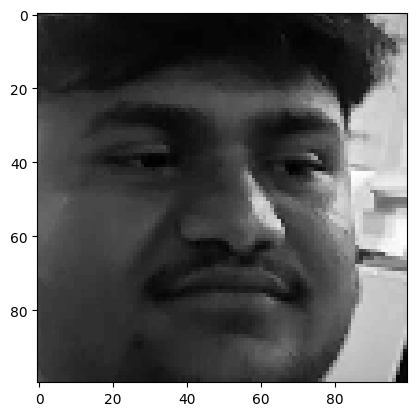

In [ ]:
plt.imshow(images[100],cmap=plt.get_cmap("gray"))
plt.show()

In [ ]:
import cv2

In [ ]:
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100,100,1)
  img = img/255
  return img

In [ ]:
images = np.array(list(map(preprocessing,images)))
print("Shape of input:",images.shape)

Shape of input: (582, 100, 100, 1)


In [ ]:
print(images)

[[[[0.74509804]
   [0.69019608]
   [0.83137255]
   ...
   [0.39215686]
   [0.85490196]
   [0.72156863]]

  [[0.64705882]
   [0.63529412]
   [0.66666667]
   ...
   [0.48627451]
   [0.92156863]
   [0.64705882]]

  [[0.57647059]
   [0.57647059]
   [0.59607843]
   ...
   [0.32156863]
   [0.68235294]
   [0.74509804]]

  ...

  [[0.0627451 ]
   [0.0627451 ]
   [0.05098039]
   ...
   [0.09411765]
   [0.10196078]
   [0.09411765]]

  [[0.05098039]
   [0.05098039]
   [0.05098039]
   ...
   [0.08627451]
   [0.09411765]
   [0.09411765]]

  [[0.05098039]
   [0.05098039]
   [0.05098039]
   ...
   [0.08235294]
   [0.09411765]
   [0.09411765]]]


 [[[0.7254902 ]
   [0.81960784]
   [0.76862745]
   ...
   [0.45098039]
   [0.92156863]
   [0.52941176]]

  [[0.61960784]
   [0.6       ]
   [0.7254902 ]
   ...
   [0.3372549 ]
   [0.88627451]
   [0.68627451]]

  [[0.61960784]
   [0.63921569]
   [0.58823529]
   ...
   [0.44313725]
   [0.92156863]
   [0.70588235]]

  ...

  [[0.0627451 ]
   [0.0627451 ]
   [0.0

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
labels = to_categorical(labels)

In [ ]:
categories = labels.shape[1]
print(categories)

6


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#import convolution layer

from tensorflow.keras.layers import Conv2D

#import pooling layer

from tensorflow.keras. layers import MaxPooling2D

#import faltten layer

from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(Conv2D(64, (5,5), input_shape=(100, 100, 1), activation="relu"))
model.add(Conv2D(64, (5,5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D (32, (3,3), activation="relu"))
model.add(Conv2D (32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(6, activation="softmax"))

In [ ]:
model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 42, 42, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                    

In [ ]:
history = model.fit(images,labels, epochs = 10,validation_split=0.1 )

Epoch 1/10
17/17 [==============================] - 14s 113ms/step - loss: 1.2314 - accuracy: 0.5526 - val_loss: 3.8824 - val_accuracy: 0.0000e+00
Epoch 2/10
17/17 [==============================] - 1s 34ms/step - loss: 0.1261 - accuracy: 0.9675 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 3/10
17/17 [==============================] - 1s 34ms/step - loss: 0.0357 - accuracy: 0.9943 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 4/10
17/17 [==============================] - 1s 36ms/step - loss: 0.0101 - accuracy: 0.9981 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 5/10
17/17 [==============================] - 1s 34ms/step - loss: 0.0069 - accuracy: 0.9962 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 6/10
17/17 [==============================] - 1s 34ms/step - loss: 0.0089 - accuracy: 0.9962 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/10
17/17 [==============================] - 1s 34ms/step - loss: 6.1719e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epo

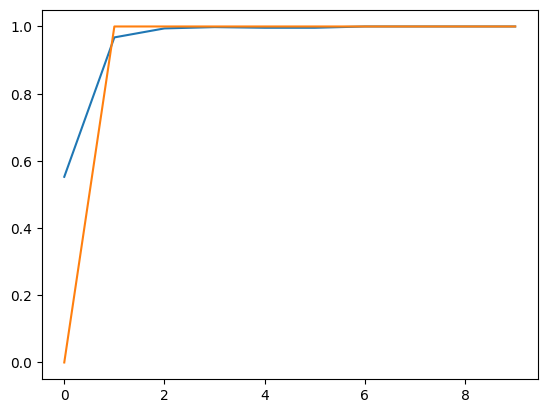

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
layer0 = Model(model.layers[0].input, model.layers[0].output)
features = layer0.predict(images[69].reshape(1,100,100,1))

1/1 [==============================] - 0s 106ms/step


In [ ]:
features.shape


(1, 96, 96, 64)

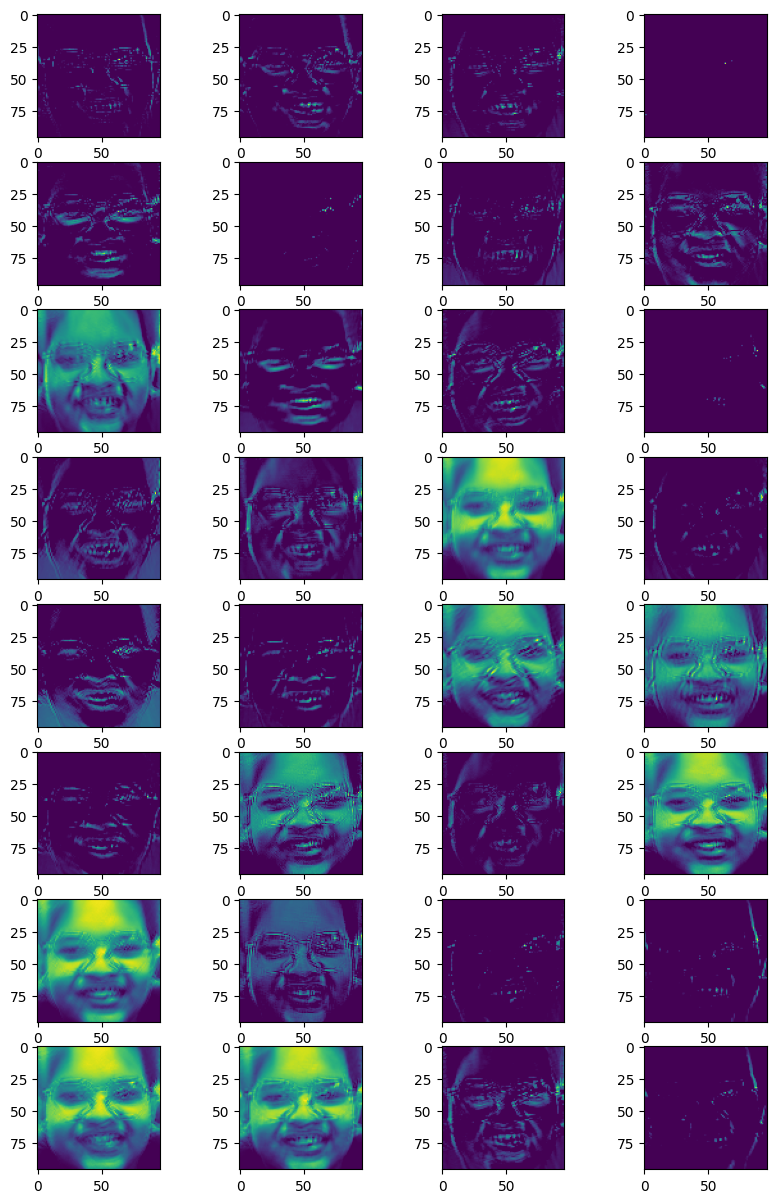

In [ ]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8, 4, i+1)
  plt.imshow(features[0,:,:,i])

In [ ]:
from google.colab import files
upload=files.upload()

Saving mahesh_17.jpg to mahesh_17.jpg


In [ ]:
d=list(upload.keys())[0]

[255 216 255 ...  63 255 217]


<ipython-input-39-6cc6288e281e>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


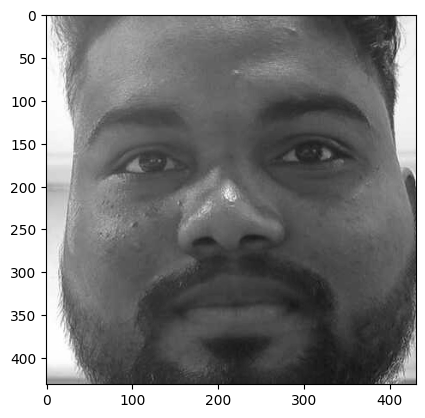

In [ ]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [ ]:
img=np.asarray(img)
img=cv2.resize(img,(100,100))
img=preprocessing(img)

In [ ]:
img=img.reshape(1,100,100,1)
print(model.predict(img))

1/1 [==============================] - 0s 32ms/step
[[4.6775073e-10 2.3449815e-08 3.3313458e-12 1.9352049e-06 9.9999809e-01
  5.5036521e-15]]


In [ ]:
prediction=model.predict(img)

1/1 [==============================] - 0s 17ms/step


In [ ]:
p=np.argmax(prediction,axis=1)
p

array([4])

In [ ]:
model.save('FINAL_MODEL.h5')